# Glass Classification

Data is from https://www.kaggle.com/datasets/uciml/glass?sortBy=voteCount&searchQuery=knn&datasetId=738

About Dataset
Context

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Content

Attribute Information:

Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) 
-- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed 
-- 4 vehiclewindowsnonfloatprocessed (none in this database) 
-- 5 containers 
-- 6 tableware 
-- 7 headlamps
Acknowledgements

https://archive.ics.uci.edu/ml/datasets/Glass+Identification
Source:

Creator: 
B. German 
Central Research Establishment 
Home Office Forensic Science Service 
Aldermaston, Reading, Berkshire RG7 4PN

Donor: 
Vina Spiehler, Ph.D., DABFT 
Diagnostic Products Corporation 
(213) 776-0180 (ext 3014)

Inspiration

Data exploration of this dataset reveals two important characteristics :
1) The variables are highly corelated with each other including the response variables:
So which kind of ML algorithm is most suitable for this dataset Random Forest , KNN or other? Also since dataset is too small is there any chance of applying PCA or it should be completely avoided?

2) Highly Skewed Data:
Is scaling sufficient or are there any other techniques which should be applied to normalize data? Like BOX-COX Power transformation?

expand_less


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('glass.csv')

In [25]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# KNN prediction

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler() #StandardScaler() object

In [9]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('Type',axis=1))

In [12]:
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [14]:
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])

In [15]:
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_feat
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
pred

array([2, 5, 1, 6, 1, 2, 5, 7, 1, 1, 2, 3, 1, 2, 2, 2, 5, 1, 1, 1, 1, 1,
       1, 7, 1, 1, 1, 5, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 6, 1, 2, 1, 2,
       1, 1, 2, 5, 6, 1, 2, 6, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2, 3])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[23  3  1  0  0  0]
 [ 3 13  0  0  0  0]
 [ 4  3  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  4  0]
 [ 0  1  0  1  0  2]]
              precision    recall  f1-score   support

           1       0.77      0.85      0.81        27
           2       0.62      0.81      0.70        16
           3       0.67      0.22      0.33         9
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         4
           7       1.00      0.50      0.67         4

    accuracy                           0.74        65
   macro avg       0.81      0.70      0.72        65
weighted avg       0.75      0.74      0.72        65



In [28]:
#try to choose a better K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

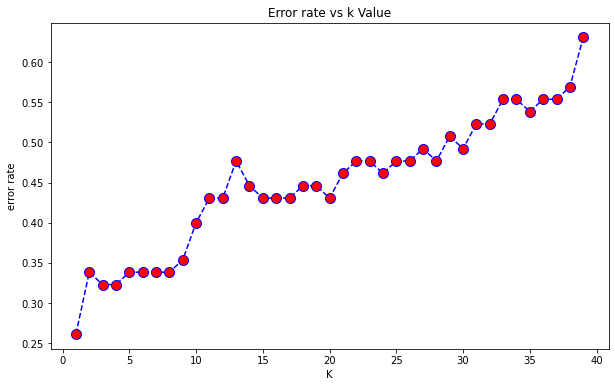

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k Value')
plt.xlabel('K')
plt.ylabel('error rate')

In [30]:
#using 1 as k value is having highest accuracy

# Decision tree prediction model

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
prediction = dtree.predict(X_test)

In [45]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[22  3  1  0  0  1]
 [ 2 12  1  0  1  0]
 [ 1  4  4  0  0  0]
 [ 0  1  0  3  0  1]
 [ 2  0  0  0  2  0]
 [ 1  1  0  0  0  2]]


              precision    recall  f1-score   support

           1       0.79      0.81      0.80        27
           2       0.57      0.75      0.65        16
           3       0.67      0.44      0.53         9
           5       1.00      0.60      0.75         5
           6       0.67      0.50      0.57         4
           7       0.50      0.50      0.50         4

    accuracy                           0.69        65
   macro avg       0.70      0.60      0.63        65
weighted avg       0.71      0.69      0.69        65



# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=500)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[24  3  0  0  0  0]
 [ 1 14  0  0  1  0]
 [ 3  4  2  0  0  0]
 [ 0  2  0  3  0  0]
 [ 1  0  0  0  3  0]
 [ 1  1  0  0  0  2]]


              precision    recall  f1-score   support

           1       0.80      0.89      0.84        27
           2       0.58      0.88      0.70        16
           3       1.00      0.22      0.36         9
           5       1.00      0.60      0.75         5
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4

    accuracy                           0.74        65
   macro avg       0.86      0.64      0.68        65
weighted avg       0.80      0.74      0.72        65



after trying 3 method, we found that random forest classifier is having highest accuracy this time, with 500 estimators set.
